<a href="https://colab.research.google.com/github/AlvLopes/Projects_Automation/blob/main/ProjetoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from google.colab import drive
from folium import plugins
from folium.plugins import HeatMap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bo = pd.read_csv ('/content/drive/MyDrive/BO.csv')

<ipython-input-46-76689c9bd638>:1: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  bo = pd.read_csv ('/content/drive/MyDrive/BO.csv')


In [ ]:
# Ler o conjunto de dados com tipos de dados especificados e desabilitando low_memory
dtype = {"LATITUDE": "float64", "LONGITUDE": "float64", "CIDADE": "str"}
df = pd.read_csv(
    "/content/drive/MyDrive/BO.csv", dtype=dtype, low_memory=False
)

In [ ]:
# Remover linhas com valores ausentes nas coordenadas geográficas
df = df.dropna(subset=["LATITUDE", "LONGITUDE"])

In [ ]:
# Etapa 1: Distribuição Geográfica dos Crimes (Mapa de Calor)
mapa_crimes = folium.Map(
    location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()], zoom_start=10
)
dados_calor = [
    [linha["LATITUDE"], linha["LONGITUDE"]] for indice, linha in df.iterrows()
]
plugins.HeatMap(dados_calor).add_to(mapa_crimes)
mapa_crimes.save("Mapa de Calor.html")

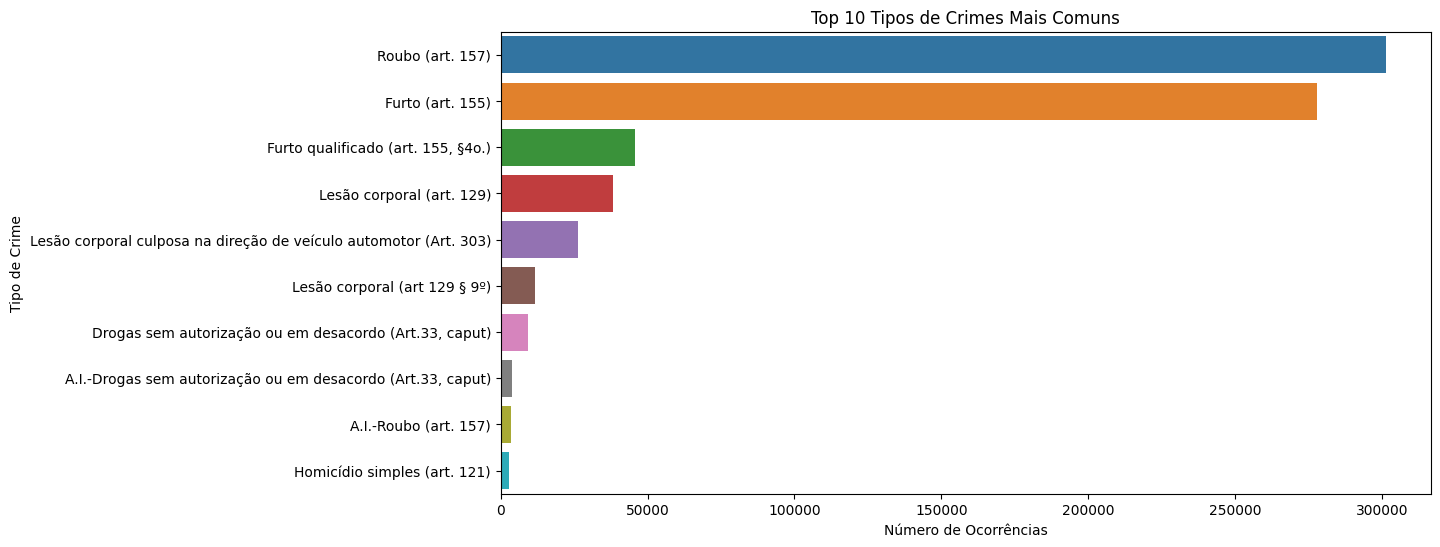

Acurácia do modelo - Gráfico 1: 49.00%
         LATITUDE  LONGITUDE                RUBRICA_NUM_PREVISTA
230845 -23.560184 -46.531603  Furto qualificado (art. 155, §4o.)
381697 -23.526756 -46.193937                    Furto (art. 155)
554296 -23.549478 -46.630083                    Furto (art. 155)
116615 -23.536866 -46.187858           Lesão corporal (art. 129)
260048 -23.716798 -46.765634                    Furto (art. 155)


In [ ]:
# Gráfico 1: Tipos de Crimes Mais Comuns (Gráfico de Barras)
plt.figure(figsize=(12, 6))
sns.countplot(y="RUBRICA", data=df, order=df["RUBRICA"].value_counts().index[:10])
plt.title("Top 10 Tipos de Crimes Mais Comuns")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Tipo de Crime")
plt.show()

# Modelo de Aprendizado de Máquina para Prever Tipos de Crimes Mais Comuns
# Pré-processamento dos dados
crimes_mais_comuns = df["RUBRICA"].value_counts().index[:10]
df["RUBRICA_NUM"] = df["RUBRICA"].apply(
    lambda x: x if x in crimes_mais_comuns else "Outros"
)

# Dividir os dados em conjuntos de treinamento e teste
X = df[["LATITUDE", "LONGITUDE"]]
y = df["RUBRICA_NUM"]
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar um modelo de classificação (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_predito = modelo.predict(X_teste)

# Avaliar o desempenho do modelo
acuracia = accuracy_score(y_teste, y_predito)
print(f"Acurácia do modelo - Gráfico 1: {acuracia * 100:.2f}%")

# Visualizar as previsões
dados_previstos = pd.DataFrame(
    {
        "LATITUDE": X_teste["LATITUDE"],
        "LONGITUDE": X_teste["LONGITUDE"],
        "RUBRICA_NUM_PREVISTA": y_predito,
    }
)
print(dados_previstos.head())

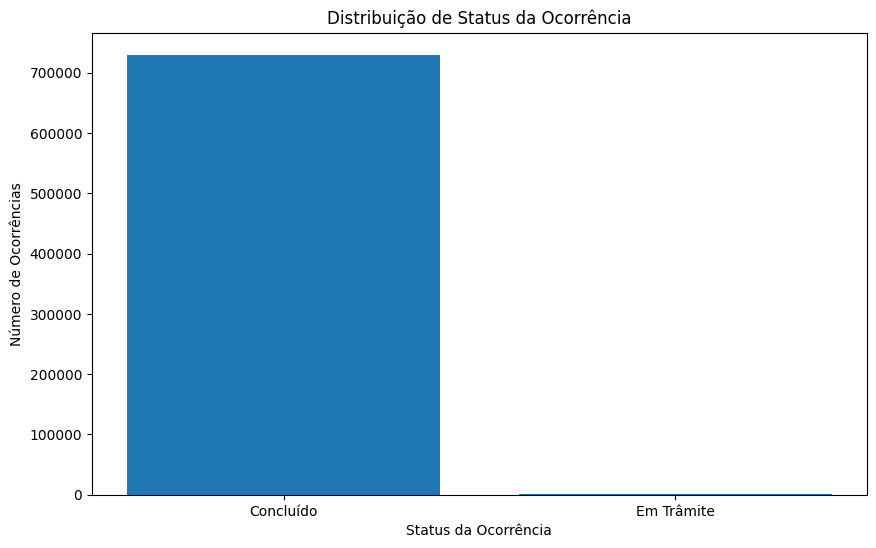

In [ ]:
# Gráfico 2: Status das Ocorrências (Gráfico de Barras)
contagem_status = df["FLAG_STATUS"].value_counts()
etiquetas_status = contagem_status.index
etiquetas_status = [
    "Concluído" if etiqueta == "C" else "Em Trâmite" if etiqueta == "T" else etiqueta
    for etiqueta in etiquetas_status
]
valores_status = contagem_status.values

# Gráfico de barras para mostrar a distribuição de status
plt.figure(figsize=(10, 6))
plt.bar(etiquetas_status, valores_status)
plt.xlabel("Status da Ocorrência")
plt.ylabel("Número de Ocorrências")
plt.title("Distribuição de Status da Ocorrência")
plt.show()

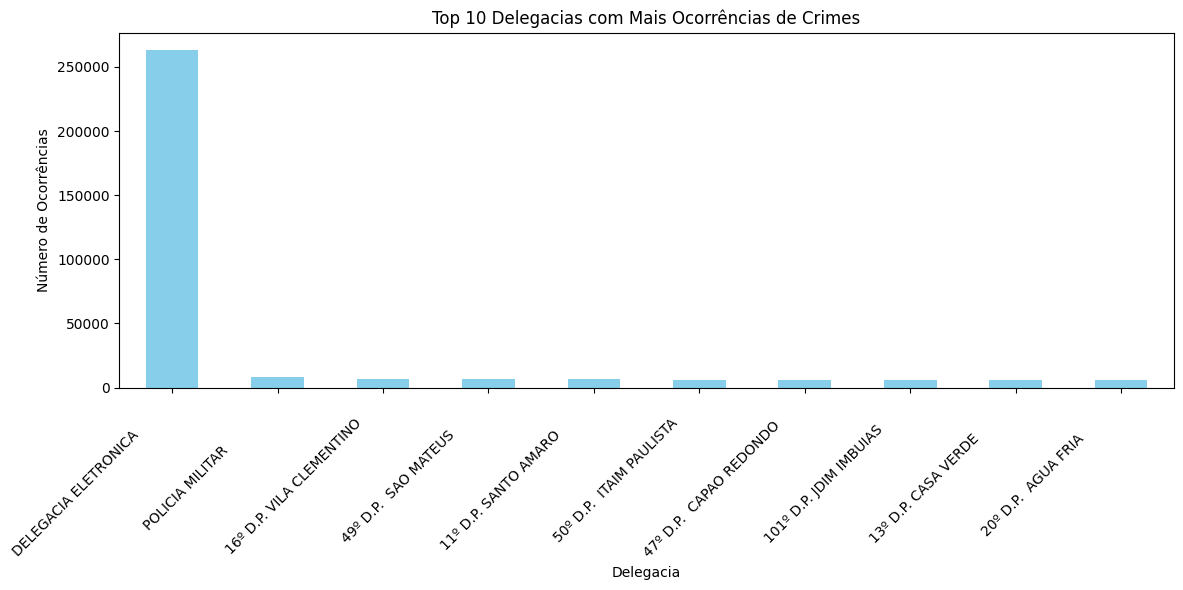

Acurácia do modelo de Regressão Logística para o Gráfico 3: 37.40%


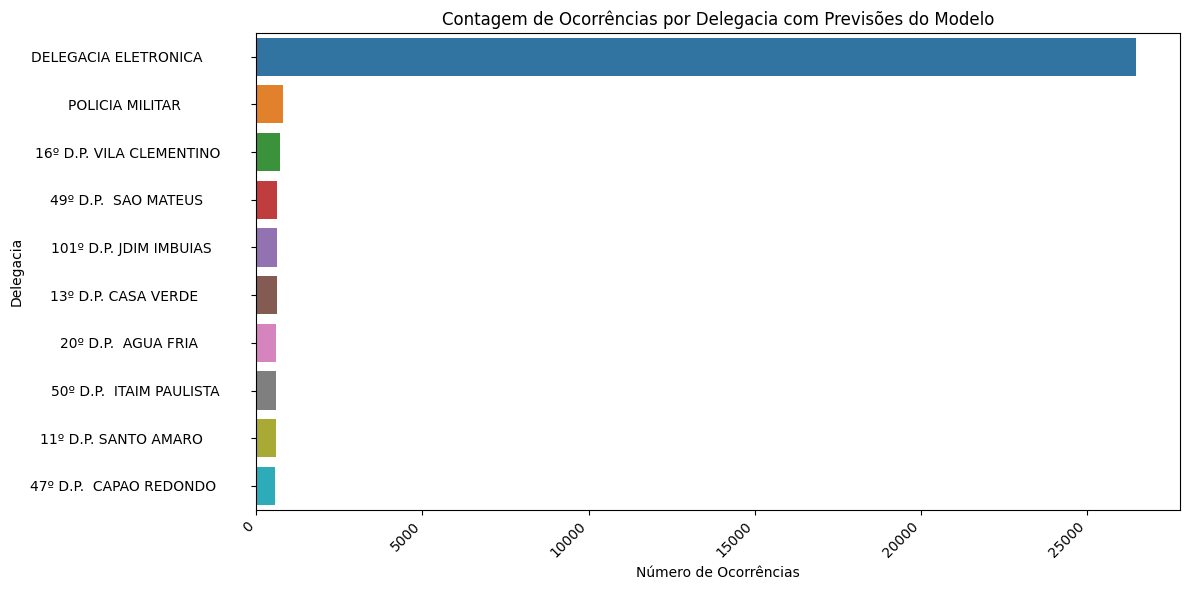

In [ ]:
# Gráfico 3: Mostra a contagem de ocorrências para cada Delegacia.
# Remover linhas com valores ausentes nas coordenadas geográficas
df = df.dropna(subset=["LATITUDE", "LONGITUDE"])

# Gráfico 3: Mostra a contagem de ocorrências para cada Delegacia.
# Contagem de ocorrências por delegacia
ocorrencias_por_delegacia = df["DELEGACIA"].value_counts()

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras
ocorrencias_por_delegacia[:10].plot(kind="bar", color="skyblue")
plt.title("Top 10 Delegacias com Mais Ocorrências de Crimes")
plt.xlabel("Delegacia")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45, ha="right")

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Amostrar uma fração menor dos dados para treinamento
df_reduzido = df.sample(frac=0.1, random_state=42)

# Pré-processamento dos dados
contagem_delegacia = df_reduzido["DELEGACIA"].value_counts()
df_reduzido["DELEGACIA_NUM"] = df_reduzido["DELEGACIA"].apply(
    lambda x: x if x in contagem_delegacia else "Outras"
)

# Dividir os dados em conjuntos de treinamento e teste
X = df_reduzido[["LATITUDE", "LONGITUDE"]]
y = df_reduzido["DELEGACIA_NUM"]
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalonar os dados (pode melhorar o desempenho do modelo)
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

# Criar e treinar o modelo de Regressão Logística
modelo_logistic = LogisticRegression(max_iter=1000, random_state=42)
modelo_logistic.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred_logistic = modelo_logistic.predict(X_teste)

# Avaliar o desempenho do modelo de Regressão Logística
acurácia_logistic = accuracy_score(y_teste, y_pred_logistic)
print(
    f"Acurácia do modelo de Regressão Logística para o Gráfico 3: {acurácia_logistic * 100:.2f}%"
)

# Gerar as previsões para a contagem de ocorrências por delegacia
contagem_delegacia_prevista = pd.DataFrame({"DELEGACIA_NUM_PREDICTED": y_pred_logistic})
contagem_delegacia_prevista["DELEGACIA_NUM_PREDICTED"] = contagem_delegacia_prevista[
    "DELEGACIA_NUM_PREDICTED"
].apply(lambda x: x if x in contagem_delegacia else "Outras")

# Contagem de Ocorrências por Delegacia no Conjunto de Dados Reduzido
ocorrencias_por_delegacia = df_reduzido["DELEGACIA_NUM"].value_counts()

# Ordenar o DataFrame
ocorrencias_por_delegacia = ocorrencias_por_delegacia.sort_values(ascending=False)

# Reduzir o número de delegacias exibidas (top 10)
top_delegacias = ocorrencias_por_delegacia.index[:10]

# Filtrar as delegacias
df_filtrado = df_reduzido[df_reduzido["DELEGACIA_NUM"].isin(top_delegacias)]

# Criar o gráfico de contagem de ocorrências por delegacia com as previsões do modelo de Regressão Logística
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df_filtrado["DELEGACIA_NUM"].value_counts().values,
    y=df_filtrado["DELEGACIA_NUM"].value_counts().index,
)
plt.title("Contagem de Ocorrências por Delegacia com Previsões do Modelo")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Delegacia")
plt.xticks(rotation=45, ha="right")  # Rotacionar as legendas do eixo y
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

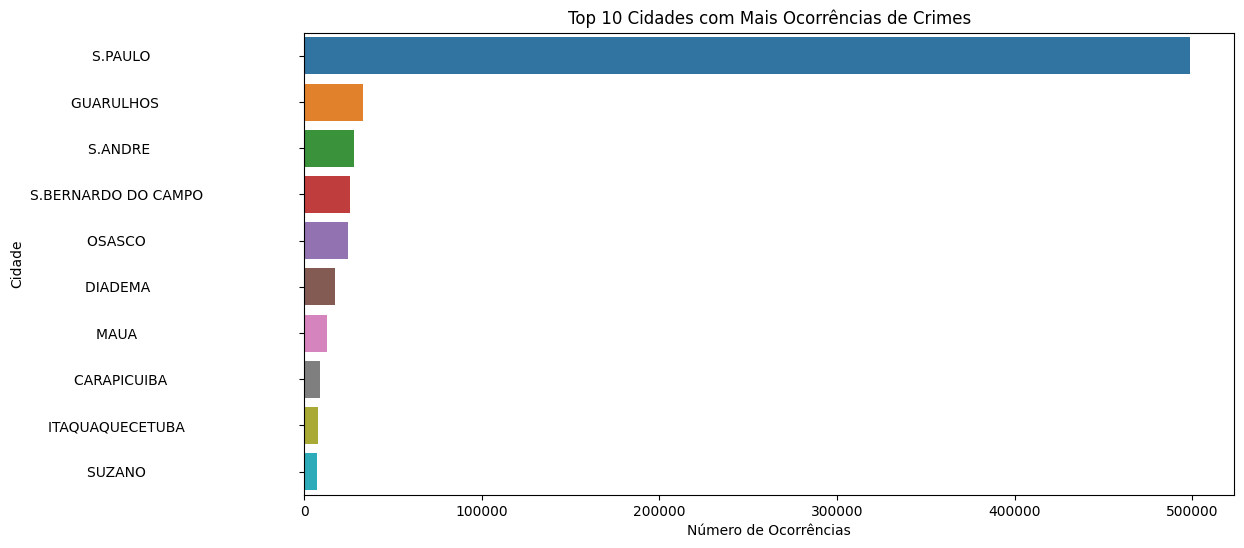

In [ ]:
# Gráfico 4: Distribuição de Crimes por Cidade
# Filtro das 10 cidades com os maiores índices de ocorrências
top_10_cidades = df["CIDADE"].value_counts().nlargest(10).index
df_top_10 = df[df["CIDADE"].isin(top_10_cidades)]

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, y="CIDADE", order=top_10_cidades)
plt.title("Top 10 Cidades com Mais Ocorrências de Crimes")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Cidade")
plt.show()

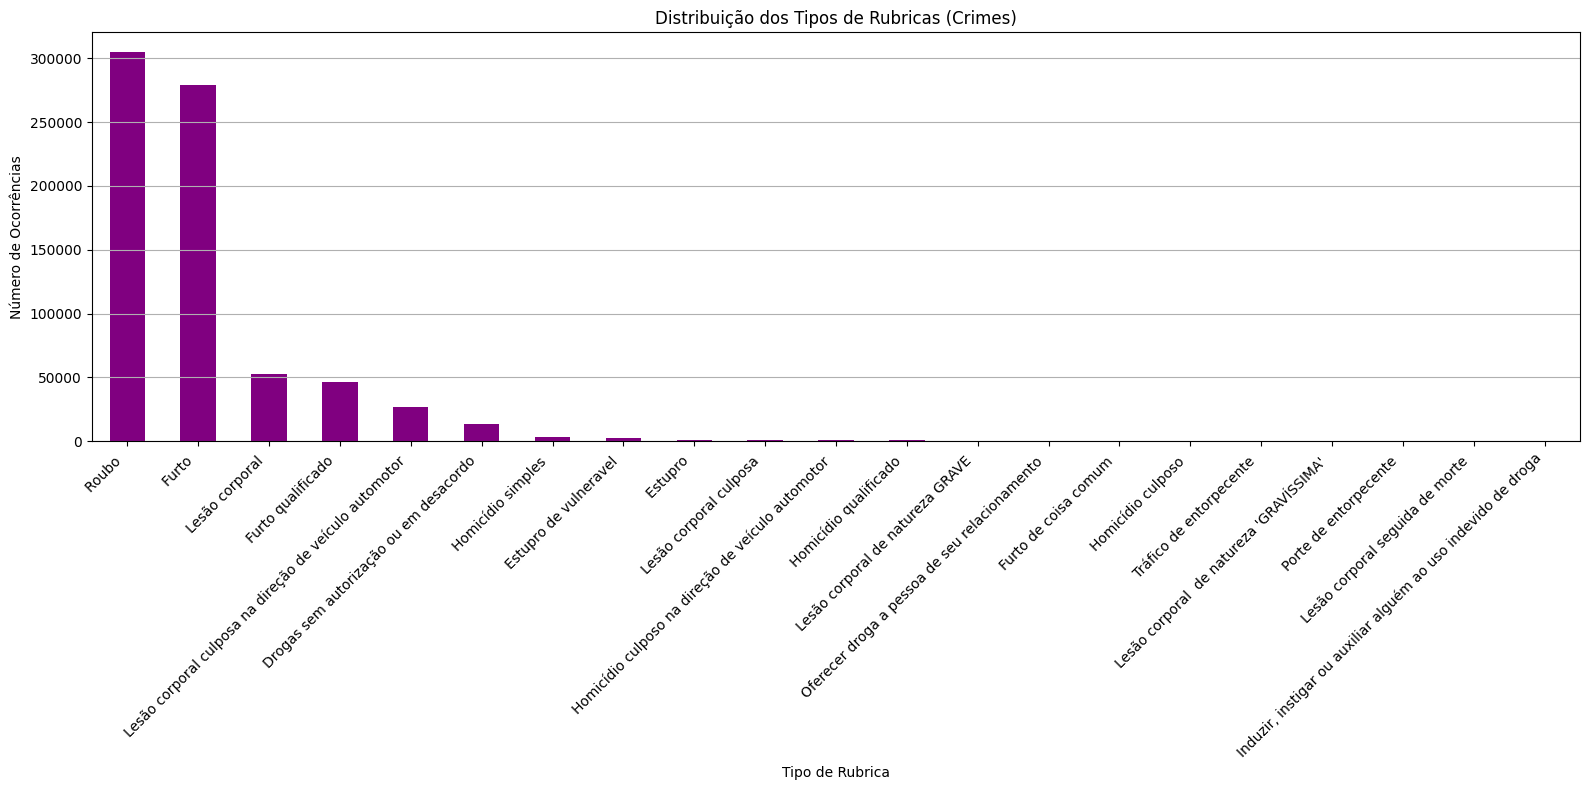

In [ ]:
# Gráfico 5: Análise da distribuição dos diferentes tipos de rubricas (crimes) no conjunto de dados.
# Pré-processamento dos rótulos
rubricas_counts = (
    df["RUBRICA"].str.split("(", n=1).str[0]
)  # Remove "(art.)" e tudo depois do primeiro parêntese
rubricas_counts = rubricas_counts.str.replace(
    "A\.I\.-", "", regex=True
)  # Remove "A.I.-"
rubricas_counts = rubricas_counts.str.replace(
    "\(|\)", "", regex=True
)  # Remove parênteses

# Contagem dos tipos de rubricas (crimes)
rubricas_counts = rubricas_counts.value_counts()

# Plotagem do gráfico de barras com tamanho maior
plt.figure(figsize=(16, 8))
rubricas_counts.plot(kind="bar", color="purple")
plt.title("Distribuição dos Tipos de Rubricas (Crimes)")
plt.xlabel("Tipo de Rubrica")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45, ha="right")  # Rotação e alinhamento dos rótulos no eixo x
plt.tight_layout()  # Ajuste automático de layout para evitar cortes
plt.grid(axis="y")

plt.show()

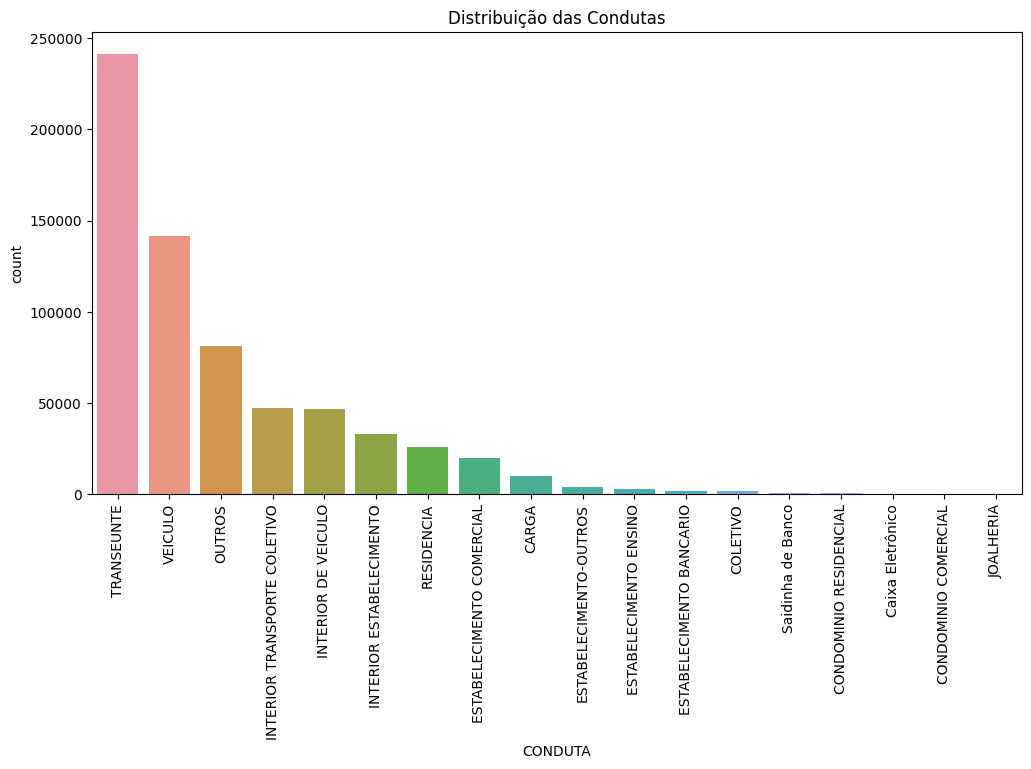

In [ ]:
#Gráfico 6: Análise da Distribuição de Condutas
# Adicionar a coluna 'CIDADE' ao DataFrame
df['CONDUTA'] = bo['CONDUTA']

# Remover linhas com valores ausentes na coluna 'CONDUTA'
df = df.dropna(subset=['CONDUTA'])

# Plotar a distribuição das condutas
plt.figure(figsize=(12, 6))
sns.countplot(x='CONDUTA', data=df, order=df['CONDUTA'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribuição das Condutas')
plt.show()

In [ ]:
# Treinando a variável alvo CONDUTA
# Adicionando DESDOBRAMENTO e CIDADE
df['DESDOBRAMENTO'] = bo['DESDOBRAMENTO']
df['CIDADE'] = bo['CIDADE']
df['RUBRICA'] = bo['RUBRICA']

# Pré-processamento dos Dados
df = df.dropna(subset=["CONDUTA"])
df = pd.get_dummies(df, columns=["RUBRICA", "DESDOBRAMENTO", "CIDADE"])  # Convertendo variáveis categóricas

# Divisão do Conjunto de Dados
X = df.drop(["CONDUTA"], axis=1)  # Recursos
y = df["CONDUTA"]  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliação do Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Acurácia do Modelo: {accuracy}")
print("Relatório de Classificação:")
print(classification_report_result)

# Prevendo o tipo de CONDUTA mais comum para o ano de 2017
# DataFrame fictício para o ano de 2017
np.random.seed(42)  # Definindo uma semente para reprodução
dados_2017 = pd.DataFrame({
    'ANO': [2017] * 100,  # Número de entradas
    'RUBRICA': np.random.choice(['Furto (art. 155)', 'Roubo (art. 157)', 'Outra RUBRICA'], size=100),
    'DESDOBRAMENTO': np.random.choice(['Outro DESDOBRAMENTO', 'INTERIOR DE VEICULO', 'Sem DESDOBRAMENTO'], size=100),
    'CIDADE': np.random.choice(['S.PAULO', 'S.PAULO'], size=100),
    'LATITUDE': np.random.uniform(-23.6, -23.5, size=100),  # Valores de latitude
    'LONGITUDE': np.random.uniform(-46.7, -46.6, size=100),  # Valores de longitude
})

# Pré-processamento dos dados
dados_2017 = pd.get_dummies(dados_2017, columns=["RUBRICA", "DESDOBRAMENTO", "CIDADE"])

# Adicione as colunas ausentes no DataFrame fictício
for coluna in X.columns:
    if coluna not in dados_2017.columns:
        dados_2017[coluna] = 0  # Preencha com 0 para as colunas ausentes

# Garanta que as colunas do DataFrame fictício estejam na mesma ordem das colunas usadas para treinamento
dados_2017 = dados_2017[X.columns]

# Fazer previsões com o modelo treinado
previsoes_2017 = model.predict(dados_2017)

# Adicionar as previsões ao DataFrame de 2017
dados_2017['CONDUTA_PREDITA'] = previsoes_2017

# Contar as ocorrências das previsões
contagem_conduta_predita = dados_2017['CONDUTA_PREDITA'].value_counts()

# Exibir a conduta mais comum prevista para 2017
conduta_mais_comum = contagem_conduta_predita.idxmax()

print(f"A conduta mais comum prevista para 2017 é: {conduta_mais_comum}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia do Modelo: 0.4102274021487415
Relatório de Classificação:
                              precision    recall  f1-score   support

                       CARGA       0.10      0.00      0.00      1964
                    COLETIVO       0.00      0.00      0.00       303
        CONDOMINIO COMERCIAL       0.00      0.00      0.00        25
      CONDOMINIO RESIDENCIAL       0.00      0.00      0.00       157
            Caixa Eletrônico       0.00      0.00      0.00        65
    ESTABELECIMENTO BANCARIO       0.00      0.00      0.00       387
   ESTABELECIMENTO COMERCIAL       0.19      0.01      0.02      3918
      ESTABELECIMENTO ENSINO       0.11      0.01      0.02       535
      ESTABELECIMENTO-OUTROS       0.00      0.00      0.00       758
         INTERIOR DE VEICULO       0.25      0.20      0.22      9305
    INTERIOR ESTABELECIMENTO       0.11      0.00      0.00      6556
INTERIOR TRANSPORTE COLETIVO       0.00      0.00      0.00      9449
                   JOA

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# PREVISÃO DO PRÓXIMO TIPO DE RÚBRICA E A SUA LOCALIDADE

# Filtrar e manter apenas as colunas relevantes
colunas_relevantes = ["LATITUDE", "LONGITUDE", "RUBRICA"]
df = bo[colunas_relevantes].dropna()

le = LabelEncoder()
df['RUBRICA'] = le.fit_transform(df['RUBRICA'])

# Divisão dos dados em conjuntos de treinamento e teste
X = df[["LATITUDE", "LONGITUDE"]]
y = df["RUBRICA"]

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criar e treinar o modelo de Regressão Logística
modelo_logistic = LogisticRegression(max_iter=10000, random_state=42)
modelo_logistic.fit(X_treino, y_treino)

# Fazer previsões para o próximo ponto
# Primeiro ponto do conjunto de teste
ponto_desconhecido = X_teste.iloc[[0]]
previsao = modelo_logistic.predict(ponto_desconhecido)

# Transformação do LabelEncoder para obter a categoria prevista
categoria_prevista = le.inverse_transform(previsao)

# Exibir os resultados
print("Previsão para o próximo ponto:")
print(f"Coordenadas do ponto: {ponto_desconhecido.values}")
print(f"Tipo de RÚBRICA previsto: {categoria_prevista[0]}")


Previsão para o próximo ponto:
Coordenadas do ponto: [[-23.56018445 -46.53160349]]
Tipo de RÚBRICA previsto: Roubo (art. 157)


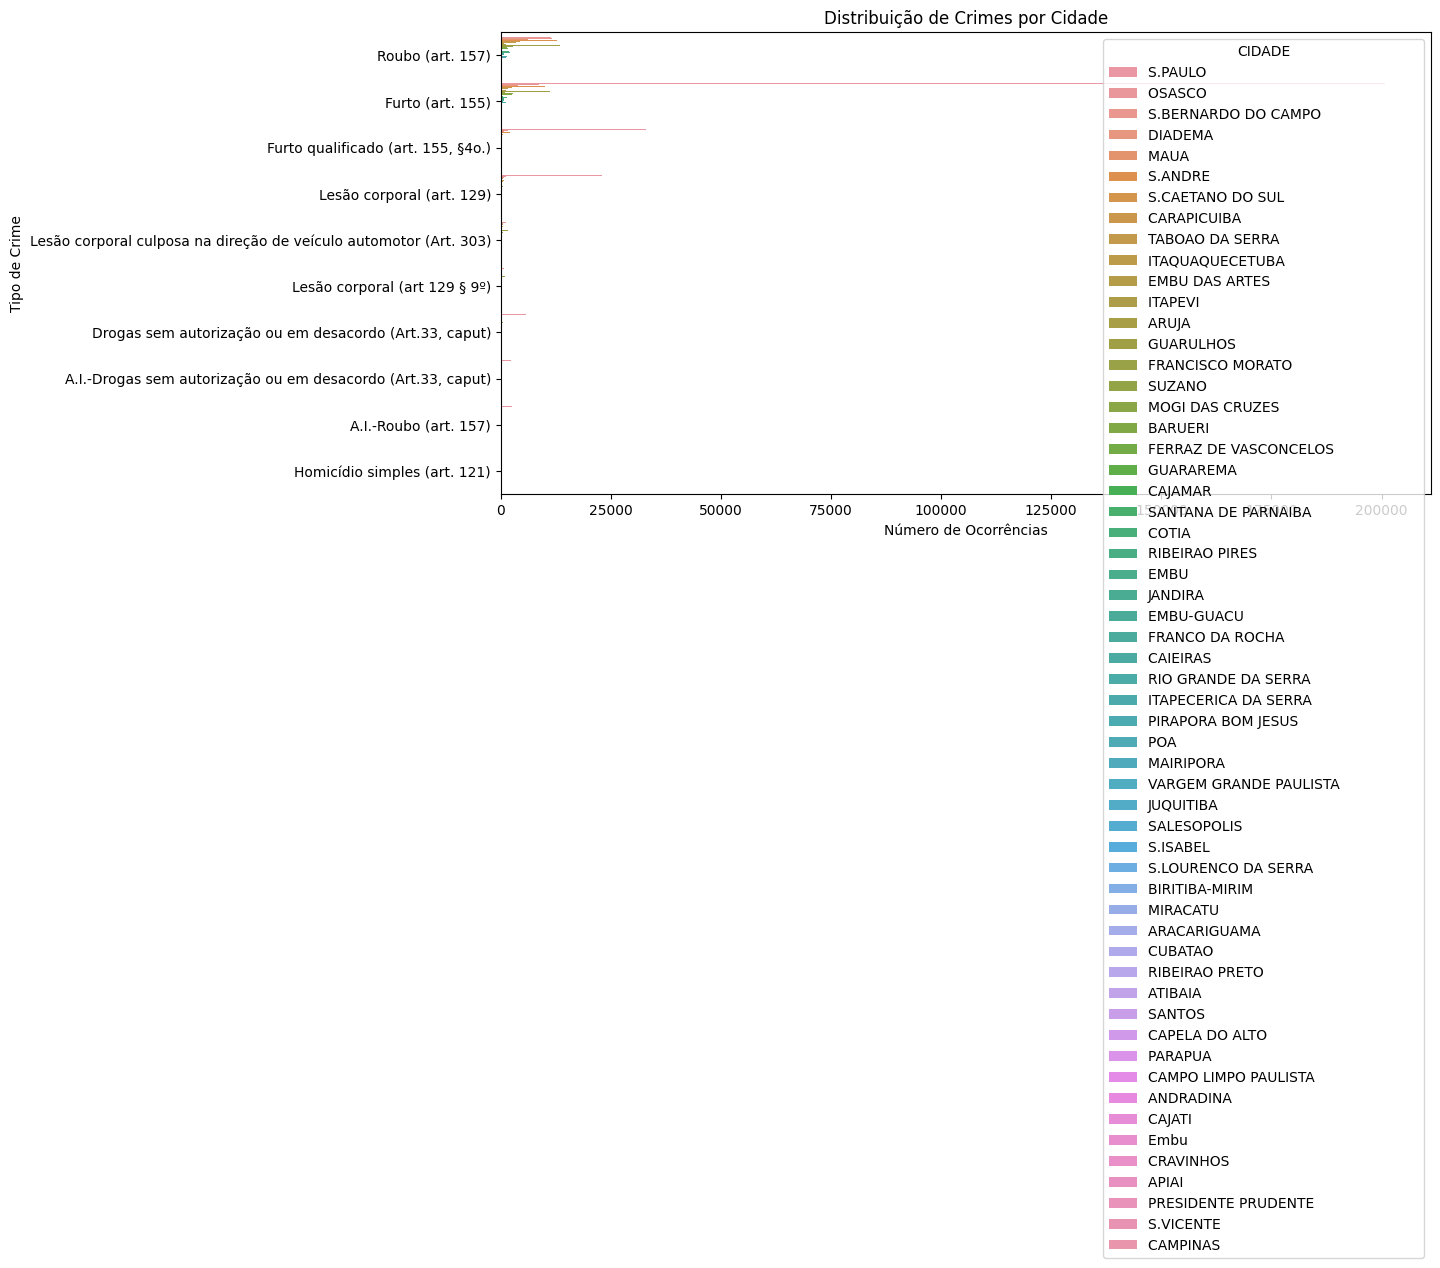

In [ ]:
# Gráfico 7: Distribuição de Crimes por Cidade
plt.figure(figsize=(12, 6))
sns.countplot(
    y="RUBRICA", data=df, hue="CIDADE", order=df["RUBRICA"].value_counts().index[:10]
)
plt.title("Distribuição de Crimes por Cidade")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Tipo de Crime")
plt.show()

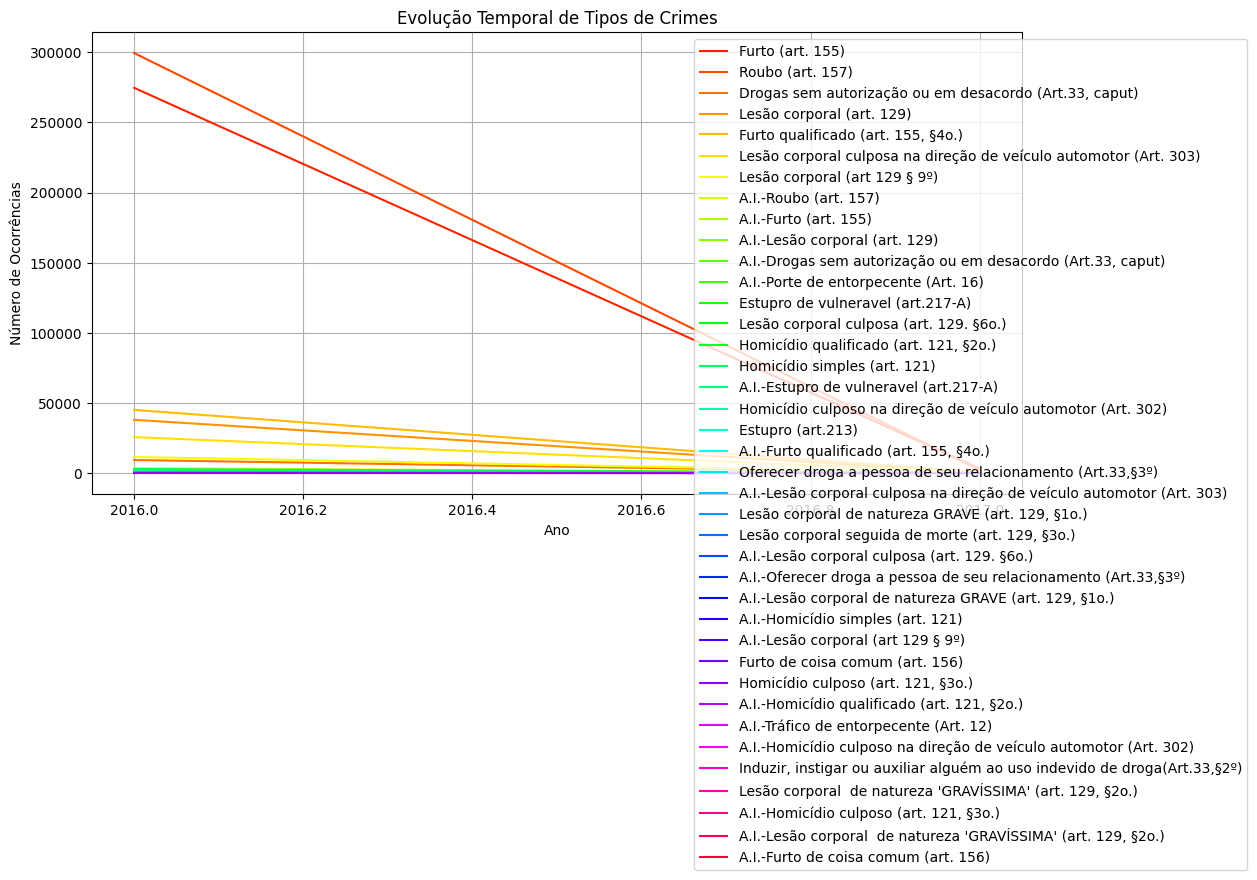

In [ ]:
# Gráfico 8: Evolução Temporal de Tipos de Crimes
# Agrupamento dos dados por ano e tipo de crime e conte o número de ocorrências
crimes_contagens = df.groupby(["ANO_BO", "RUBRICA"]).size().unstack()

# Filtrar tipos de crimes únicos para evitar repetições na legenda
tipos_de_crime_exclusivos = df["RUBRICA"].unique()

# Esquema de cores personalizado para os tipos de crimes
colores = sns.color_palette("hsv", len(tipos_de_crime_exclusivos))

# Gráficos de linha para cada tipo de crime com cores diferentes
plt.figure(figsize=(12, 6))
for i, crime_type in enumerate(tipos_de_crime_exclusivos):
    if crime_type in crimes_contagens.columns:
        plt.plot(
            crimes_contagens.index,
            crimes_contagens[crime_type],
            label=crime_type,
            color=colores[i],
        )

plt.title("Evolução Temporal de Tipos de Crimes")
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()